<a href="https://colab.research.google.com/github/Vigneshwara3/CH-HPP/blob/main/CH_House_Price_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **IMPORTING LIB AND DATASET**





In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
data = pd.read_csv("/content/train-chennai-sale.csv")

In [3]:
data.shape

(7109, 22)

In [4]:
data.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE'],
      dtype='object')

In [5]:
pd.set_option('display.max_columns',None)


In [6]:
data.head(5)

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [7]:
data.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

In [8]:
data.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DATE_SALE         object
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
DATE_BUILD        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
REG_FEE            int64
COMMIS             int64
SALES_PRICE        int64
dtype: object

# **DATA CLEANING**

PRT_ID

In [9]:
data = data.drop(columns = ['PRT_ID'])

AREA

In [10]:
data['AREA'] = data['AREA'].replace(['Adyr'], 'Adyar')
data['AREA'] = data['AREA'].replace(['Ana Nagar','Ann Nagar',], 'Anna Nagar')
data['AREA'] = data['AREA'].replace(['Chormpet','Chrmpet','Chrompt','Chrompet'],'Chromepet')
data['AREA'] = data['AREA'].replace(['Karapakam'],'Karapakkam')
data['AREA'] = data['AREA'].replace(['TNagar'],'T Nagar')
data['AREA'] = data['AREA'].replace(['KKNagar'],'KK Nagar')
data['AREA'] = data['AREA'].replace(['Velchery'],'Velachery')

INT_SQFT

In [11]:
data.INT_SQFT.describe()

count    7109.000000
mean     1382.073006
std       457.410902
min       500.000000
25%       993.000000
50%      1373.000000
75%      1744.000000
max      2500.000000
Name: INT_SQFT, dtype: float64

DATE_SALE

In [12]:
import datetime
#dateString = 'April/2022/01::19:05:00'
#date = datetime.datetime.strptime(dateString, "%B/%Y/%d::%H:%M:%S") #string to datetime#
data.DATE_SALE = pd.to_datetime(data.DATE_SALE, format='%d-%m-%Y')

In [13]:
data.DATE_SALE

0      2011-05-04
1      2006-12-19
2      2012-02-04
3      2010-03-13
4      2009-10-05
          ...    
7104   2011-01-03
7105   2004-04-08
7106   2006-08-25
7107   2009-08-03
7108   2005-07-13
Name: DATE_SALE, Length: 7109, dtype: datetime64[ns]

DIST_MAINROAD

In [14]:
data.DIST_MAINROAD.describe()


count    7109.000000
mean       99.603179
std        57.403110
min         0.000000
25%        50.000000
50%        99.000000
75%       148.000000
max       200.000000
Name: DIST_MAINROAD, dtype: float64

N_BEDROOM

In [15]:
#data.N_BEDROOM.isnull().sum()*100/data.shape[0]
#data.N_BEDROOM = data.N_BEDROOM.astype('int64')

In [16]:
data=data.dropna(subset=['N_BEDROOM'])
data.N_BEDROOM = data.N_BEDROOM.astype('int64')

N_BATHROOM

In [17]:
data.N_BATHROOM.isnull().sum()*100/data.shape[0]

0.07034327518289252

In [18]:
data=data.dropna(subset=['N_BATHROOM'])
data.N_BATHROOM = data.N_BATHROOM.astype('int64')

In [19]:
data.dtypes

AREA                     object
INT_SQFT                  int64
DATE_SALE        datetime64[ns]
DIST_MAINROAD             int64
N_BEDROOM                 int64
N_BATHROOM                int64
N_ROOM                    int64
SALE_COND                object
PARK_FACIL               object
DATE_BUILD               object
BUILDTYPE                object
UTILITY_AVAIL            object
STREET                   object
MZZONE                   object
QS_ROOMS                float64
QS_BATHROOM             float64
QS_BEDROOM              float64
QS_OVERALL              float64
REG_FEE                   int64
COMMIS                    int64
SALES_PRICE               int64
dtype: object

**N_ROOM**

In [20]:
data.N_ROOM.isnull().sum()

0

**SALE_COND**

In [21]:
data['SALE_COND']= data['SALE_COND'].replace(['Adj Land'],'AdjLand')
data['SALE_COND']= data['SALE_COND'].replace(['Partiall','PartiaLl'],'Partial')
data['SALE_COND']= data['SALE_COND'].replace(['Ab Normal'],'AbNormal')

**PARK_FACIL**

In [22]:
data['PARK_FACIL']= data['PARK_FACIL'].replace(['Noo'],'No')

**DATE_BUILD**

In [23]:
data.DATE_BUILD = pd.to_datetime(data.DATE_BUILD, format='%d-%m-%Y')

**BUILDTYPE**

In [24]:
data['BUILDTYPE']= data['BUILDTYPE'].replace(['Comercial'],'Commercial')
data['BUILDTYPE']= data['BUILDTYPE'].replace(['Other'],'Others')

In [25]:
data.BUILDTYPE.unique()
data.BUILDTYPE.value_counts()

House         2443
Others        2331
Commercial    2329
Name: BUILDTYPE, dtype: int64

**UTILITY_AVAIL**

In [26]:
data['UTILITY_AVAIL']= data['UTILITY_AVAIL'].replace(['All Pub'],'AllPub')

**STREET**

In [27]:
data['STREET']= data['STREET'].replace(['Pavd'],'Paved')
data['STREET']= data['STREET'].replace(['NoAccess'],'No Access')

**MZZONE**

In [28]:
data.MZZONE.unique()
data.MZZONE.value_counts()

RL    1856
RH    1822
RM    1813
C      550
A      537
I      525
Name: MZZONE, dtype: int64

**QS_ROOMS**

**QS_BATHROOM**

**QS_BEDROOM**

**QS_OVERALL**

**REG_FEE**

In [29]:
data = data.drop(columns = ['REG_FEE'])

**COMMIS**

In [30]:
data = data.drop(columns = ['COMMIS'])

**SALES_PRICE**

In [31]:
data.SALES_PRICE.describe()

count    7.103000e+03
mean     1.089477e+07
std      3.769549e+06
min      2.156875e+06
25%      8.270900e+06
50%      1.033464e+07
75%      1.299422e+07
max      2.366734e+07
Name: SALES_PRICE, dtype: float64

**AGING_IN_MONTHS**

In [32]:
data['Aging_In_Months'] = (data['DATE_SALE']-data['DATE_BUILD']).astype('timedelta64[M]')

**AGING_IN_YEARS**

In [33]:

data['Aging_In_Years'] = (data['Aging_In_Months'] / 12).astype('int64')

### ***Exploratory Data Analysis***

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


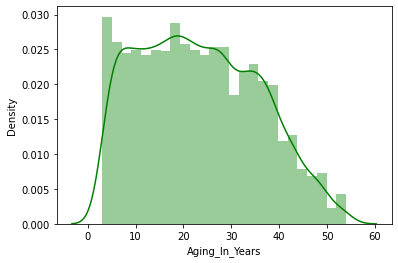

In [34]:
sns.distplot(data.Aging_In_Years,color='green')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


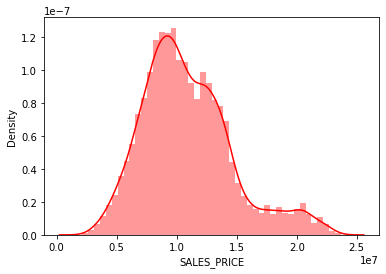

In [35]:
sns.distplot(data.SALES_PRICE,color='red')

Text(0.5, 1.0, 'MZZONE vs TOTAL_SALE_PRICE')

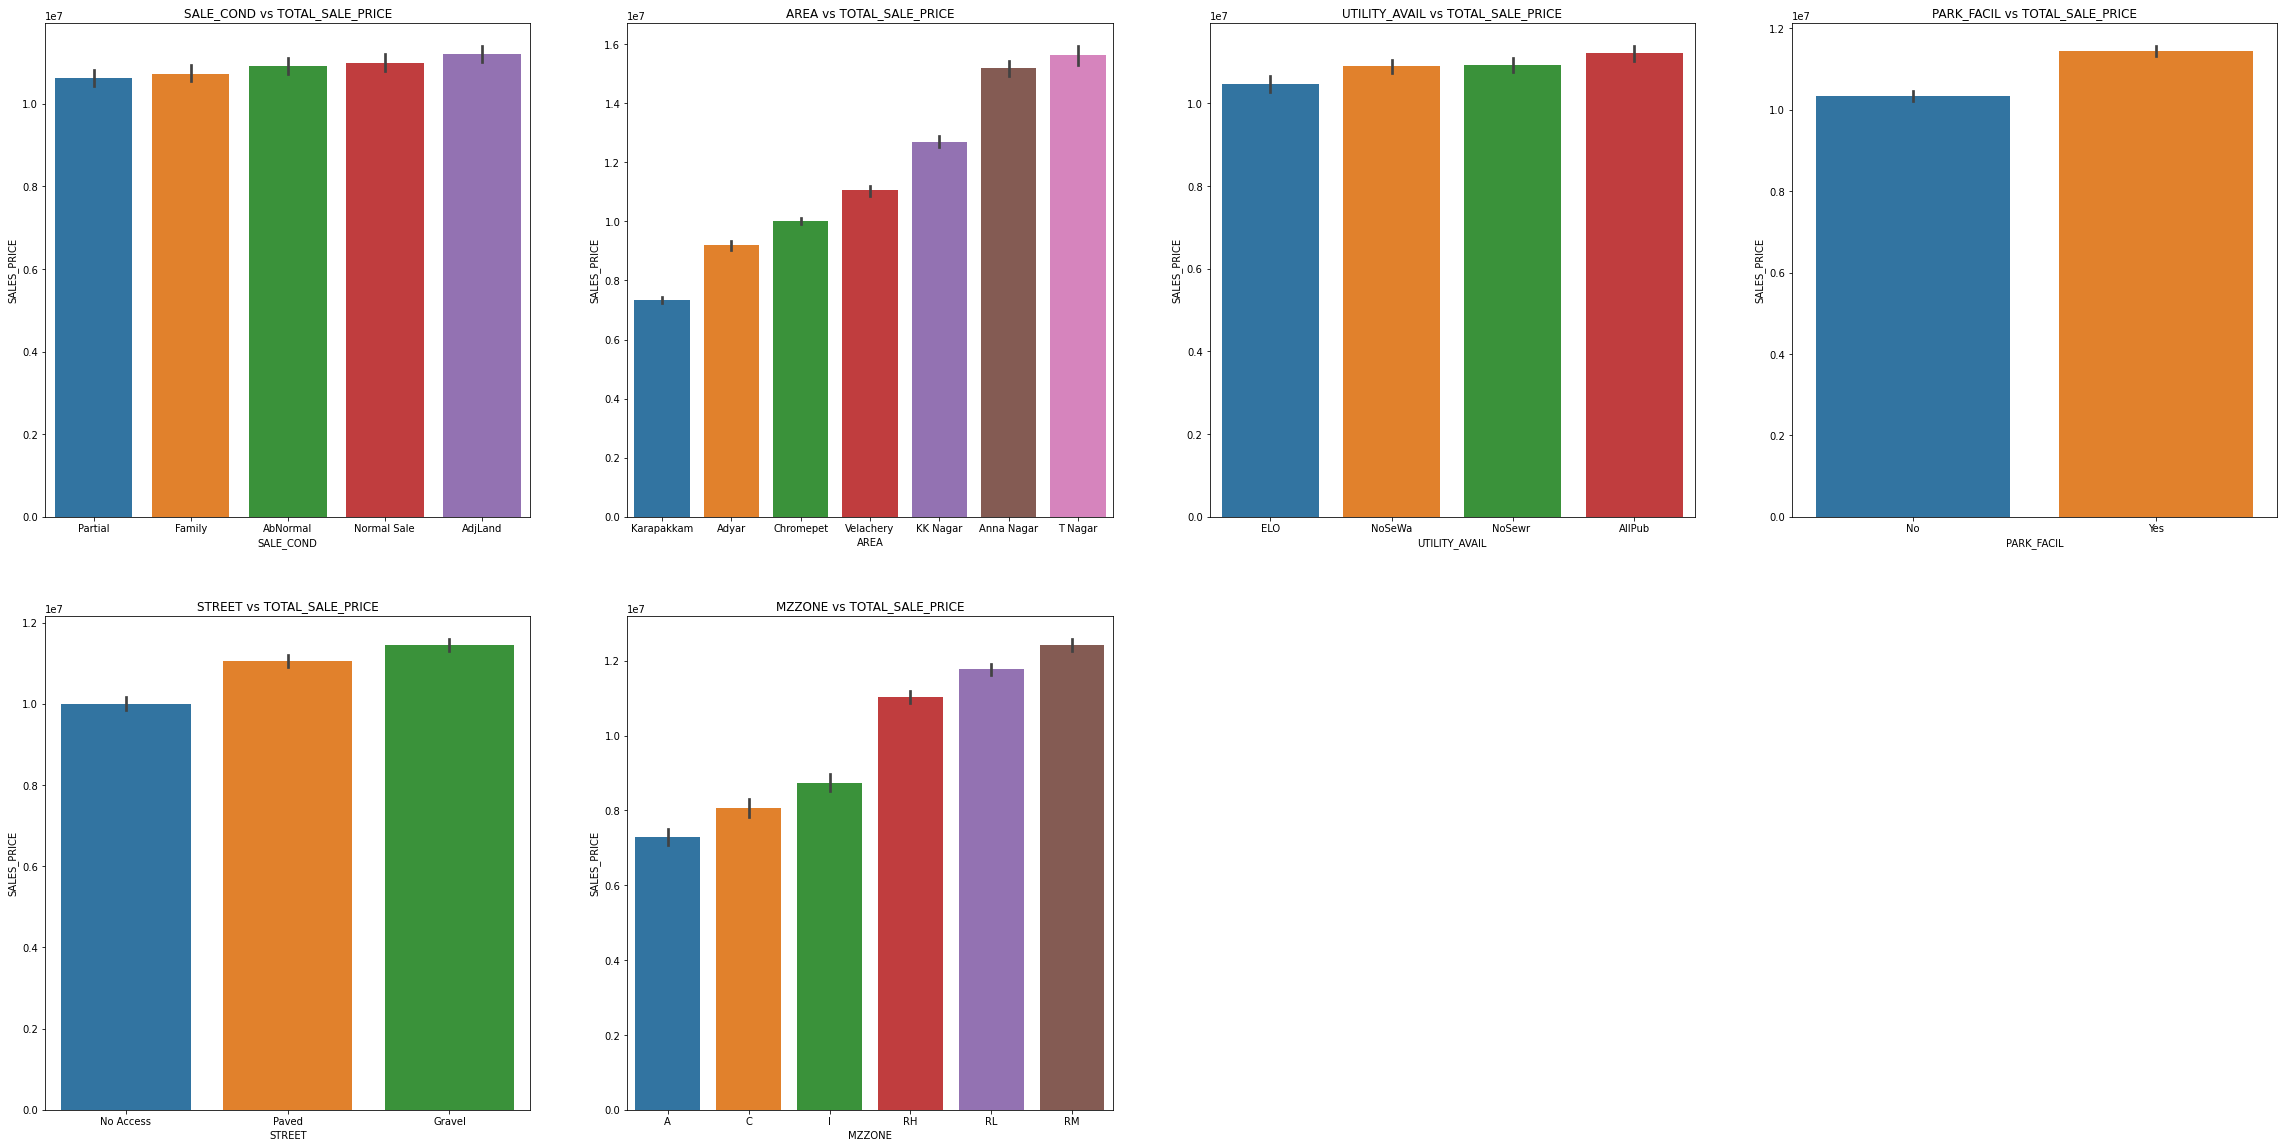

In [36]:
plt.figure(figsize=(40,20))
plt.subplot(241)
#sns.regplot(x=data['AREA'],y=data['SALES_PRICE'],scatter_kws={"color":"green"},line_kws={"color":"red"})
#plt.title("AREA vs SALES_PRICE")
sns.barplot(x=data.SALE_COND,y=data.SALES_PRICE,order=data.groupby('SALE_COND')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['SALE_COND'])
plt.title('SALE_COND vs TOTAL_SALE_PRICE')
plt.subplot(242)
sns.barplot(x=data.AREA,y=data.SALES_PRICE,order=data.groupby('AREA')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['AREA'])
plt.title('AREA vs TOTAL_SALE_PRICE')

plt.subplot(243)
sns.barplot(x=data.UTILITY_AVAIL,y=data.SALES_PRICE,order=data.groupby('UTILITY_AVAIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['UTILITY_AVAIL'])
plt.title('UTILITY_AVAIL vs TOTAL_SALE_PRICE')

plt.subplot(244)
sns.barplot(x=data.PARK_FACIL,y=data.SALES_PRICE,order=data.groupby('PARK_FACIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['PARK_FACIL'])
plt.title('PARK_FACIL vs TOTAL_SALE_PRICE')

plt.subplot(245)
sns.barplot(x=data.STREET,y=data.SALES_PRICE,order=data.groupby('STREET')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['STREET'])
plt.title('STREET vs TOTAL_SALE_PRICE')

plt.subplot(246)
sns.barplot(x=data.MZZONE,y=data.SALES_PRICE,order=data.groupby('MZZONE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['MZZONE'])
plt.title('MZZONE vs TOTAL_SALE_PRICE')


**Label Encoding**

In [37]:
data.AREA = data.AREA.map({'Karapakkam':1, 'Anna Nagar':6, 'Adyar':2, 'Velachery':4, 'Chromepet':3,'KK Nagar':5, 'T Nagar':7})
data.SALE_COND= data.SALE_COND.map({'AbNormal':3,'Family':2, 'Partial':1, 'AdjLand':5, 'Normal Sale':4})
data.PARK_FACIL = data.PARK_FACIL.map({'Yes':1, 'No':0})
data.UTILITY_AVAIL = data.UTILITY_AVAIL.map({'AllPub':4, 'ELO':1, 'NoSewr ':3, 'NoSeWa':2})
data.STREET = data.STREET.map({'Paved':2, 'Gravel':3, 'No Access':1})
data.MZZONE = data.MZZONE.map({'A':1, 'RH':4, 'RL':5, 'I':3, 'C':2, 'RM':6})

**OneHotEncoding**

In [38]:
data=pd.get_dummies(data,columns=['BUILDTYPE'])

**Correlation**

In [39]:
correlation=data.corr()

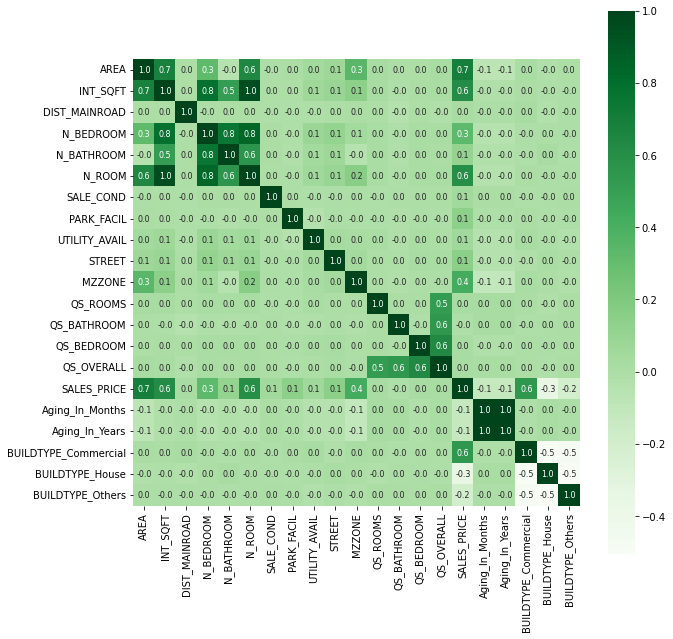

In [40]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True, fmt='.1f',annot=True,annot_kws={'size':8},cmap='Greens')

In [41]:
data[['STREET','SALES_PRICE']].corr()

,STREET,SALES_PRICE
STREET,1.000000,0.149507
SALES_PRICE,0.149507,1.000000


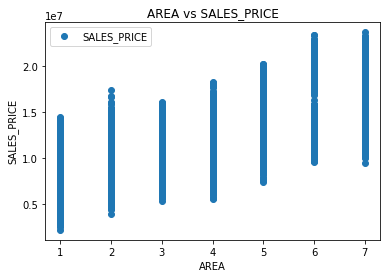

,AREA,SALES_PRICE
AREA,1.000000,0.694194
SALES_PRICE,0.694194,1.000000


In [42]:
data.plot(x='AREA', y='SALES_PRICE', style='o')
plt.title('AREA vs SALES_PRICE')
plt.xlabel('AREA')
plt.ylabel('SALES_PRICE')
plt.show()
data[['AREA','SALES_PRICE']].corr()

In [43]:
x = data.iloc[:,[0,1,4,5,6,7,8,10,11,20,21,22]]
y = data.iloc[:,[17]]

In [44]:
x.isnull().sum()

AREA                    0
INT_SQFT                0
N_BEDROOM               0
N_BATHROOM              0
N_ROOM                  0
SALE_COND               0
PARK_FACIL              0
UTILITY_AVAIL           0
STREET                  0
BUILDTYPE_Commercial    0
BUILDTYPE_House         0
BUILDTYPE_Others        0
dtype: int64

# **Training & Test Data**

In [45]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [46]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [47]:
print(x.shape,x_train.shape,x_test.shape)

(7103, 12) (5682, 12) (1421, 12)


# **Model Training**

# **LINEAR REGRESSION**

In [48]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 
scaler.fit(x_train,y_train) 
x_train_scaled = scaler.transform(x_train) 
x_test_scaled = scaler.transform(x_test)  

In [49]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train_scaled, y_train)

LinearRegression()

In [50]:
y_pred = regressor.predict(x_test_scaled)

In [51]:
regressor.intercept_

array([10910706.81714185])

In [52]:
from sklearn import metrics
print('R2_SCORE:', metrics.r2_score(y_test,y_pred))

R2_SCORE: 0.8723484312356063


# **RANDOM FOREST REGRESSION**

In [53]:
from sklearn.ensemble import RandomForestRegressor

In [54]:
rf = RandomForestRegressor(n_estimators=100, max_depth=15,max_features='sqrt')
rf.fit(x_train,y_train);
y_pred_rf = rf.predict(x_test)
print('R2_SCORE:', metrics.r2_score(y_test,y_pred_rf))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R2_SCORE: 0.9444319581887453


# **XGBOOST**

In [55]:
from xgboost import XGBRegressor

In [56]:
model=XGBRegressor()

In [57]:
model.fit(x_train,y_train)

[07:47:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

# **Evaluation**

## **Prediction on Training & Test data**

In [58]:
Training_data_Pred=model.predict(x_train)

In [59]:
print(Training_data_Pred)

[13756758.  5298479.  4994541. ... 13522792.  8786222.  6545001.]


In [60]:
score_1 = metrics.r2_score(y_train,Training_data_Pred)

In [61]:
print('R2_score_error:', score_1)

R2_score_error: 0.9536841213126783


In [62]:
Test_data_Pred=model.predict(x_test)

In [69]:
score_1 = metrics.r2_score(y_test,Test_data_Pred)

In [70]:
print('R2_score_error:', score_1)

R2_score_error: 0.9493045492447114


# **Visualizing the Actual & Predicted Prices**

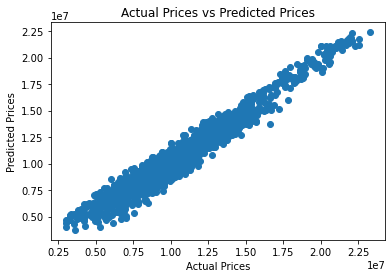

In [65]:
plt.scatter(y_test,Test_data_Pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

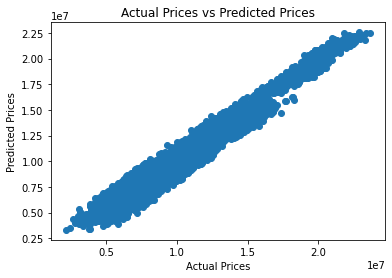

In [66]:
plt.scatter(y_train,Training_data_Pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()